# Assignment 8,9

Rosa Kurtz

fine art generator

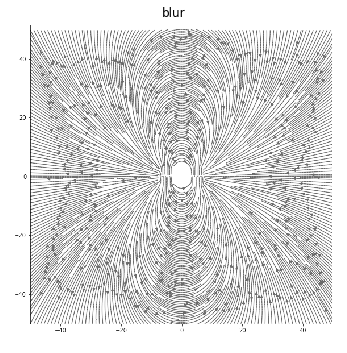

In [4]:
#part a) read in the values of 'blur.txt' and make the greyscale picture show
        #up as a density plot.

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

mpl.rcParams['legend.frameon'] = False

f=open("Desktop/Compnotes/cpresources/blur.txt",'r')
contents =f.read()
data=contents.split('\n') # 1025 indented lines but the last 1 is a false line that is empty
n=len(data)-1
data=contents.split() # 1048576 values total
m=int(len(data)/n)



W=np.zeros([n,m], dtype=float)

k=0
for j in range(0,n):
    for i in range(0,m):
        W[j,i]=data[k]
        k=k+1   

        
img = Image.open('Desktop/dipole.png').convert('L')
img = ImageOps.expand(img,border=5,fill=300)

im_array = np.asarray(img)

#part a)
W=np.zeros([n,m], dtype=float)

W=im_array
fig = plt.figure(figsize=(5, 5))



ax1 = fig.add_subplot(111)
k = ax1.imshow(W, cmap='Greys_r')
#fig.colorbar(k, ax=ax1)
#plt.ylabel('y (30,000 m)')
#plt.xlabel('x (30,000 m)')
plt.title('blur')
plt.axis('off')

fig.tight_layout()
plt.show()


(1024, 1024)


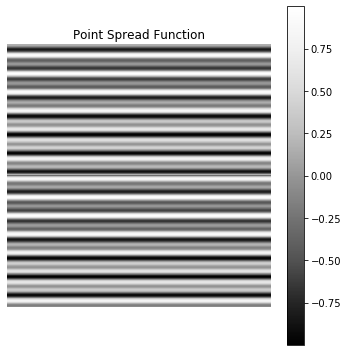

In [53]:
#b)
# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt,log

mpl.rcParams['legend.frameon'] = False

f=open("Desktop/Compnotes/cpresources/blur.txt",'r')
contents =f.read()
data=contents.split('\n') # 1025 indented lines but the last 1 is a false line that is empty
n=len(data)-1
data=contents.split() # 1048576 values total
m=int(len(data)/n)

#print(n,m)

o=25   #o is σ (sigma)

def f(x,y):
    
    return cos(x*o)*sin(x/o)
  
    
G=np.ones([n,m], dtype=float)


for j in range(0,n):
    if(j<n/2):
        x=j
    else:
        x=j-n
    for i in range(0,m):
        if(i<n/2):
            y=i
        else:
            y=i-n
        G[j,i]=f(x,y)
    
  
        
fig = plt.figure(figsize=(5, 5))

ax1 = fig.add_subplot(111)
k = ax1.imshow(G, cmap='Greys_r')
fig.colorbar(k, ax=ax1)
plt.title('Point Spread Function')
plt.axis('off')

print(G.shape)

fig.tight_layout()
plt.show()



(1024, 1024)
(1024, 1024)


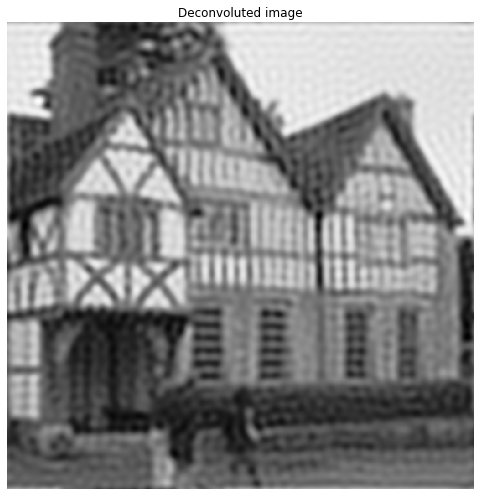

In [3]:
#part c)

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.fftpack as fft


mpl.rcParams['legend.frameon'] = False

f=open("Desktop/Compnotes/cpresources/blur.txt",'r')
contents =f.read()
data=contents.split('\n') # 1025 indented lines but the last 1 is a false line that is empty
n=len(data)-1
data=contents.split() # 1048576 values total
m=int(len(data)/n)

#part a)
W=np.zeros([n,m], dtype=float)

k=0
for j in range(0,n):
    for i in range(0,m):
        W[j,i]=data[k]
        k=k+1 
        
#part b) 
o=25   #o is σ (sigma)

def f(x,y):
    return exp(  -((x**2)+(y**2)) / (2*(o**2))   )
    
G=np.zeros([n,m], dtype=float)
for j in range(0,n):
    if(j<n/2):
        x=j
    else:
        x=j-n
    for i in range(0,m):
        if(i<m/2):
            y=i
        else:
            y=i-m
        G[j,i]=f(x,y)
####end part b

print(W.shape)
print(G.shape)

rfW=np.fft.rfft2(W)
rfG=np.fft.rfft2(G)
a,b=rfW.shape
division=np.zeros([a,b], dtype=complex)
for i in range(0,a):
    for j in range(0,b):
        if(rfG[i,j]>10**-5):
            division[i,j]=rfW[i,j]/rfG[i,j]
        else:
            division[i,j]=rfW[i,j]
            
#/rfG  ##this causes error probably because [we know] it's wrong 
final=np.fft.irfft2(division)

fig = plt.figure(figsize=(7, 7))

ax1 = fig.add_subplot(111)
k = ax1.imshow(final, cmap='Greys_r')
#fig.colorbar(k, ax=ax1)

plt.title('Deconvoluted image')
plt.axis('off')

fig.tight_layout()
plt.show()




location on desktop: qc
num: 20
do what? 'f','g','c','s','co': g
(1010, 1010)
(1010, 1010)


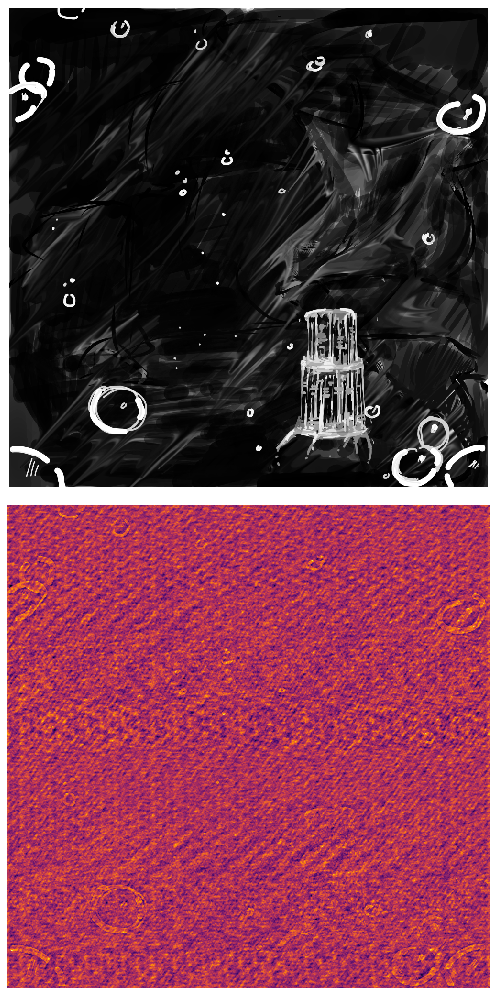

In [66]:
#part c)

# MPL
import matplotlib        as mpl
import matplotlib.pyplot as plt

from PIL import Image, ImageOps
import urllib.request

# NumPy
import numpy as np
from numpy import cos, exp, pi, sin, sinc, sinh, sqrt

# SciPy
import scipy.fftpack as fft


mpl.rcParams['legend.frameon'] = False

temp1=input("location on desktop: ")
o=input("num: ")
o=float(o)

loc=temp1

do=input("do what? 'f','g','c','s','co': ")


string=""
string=string+"Desktop/" + loc + ".png"

img = Image.open(string).convert('L')
img = ImageOps.expand(img,border=5,fill=300)

im_array = np.asarray(img)

n,m=im_array.shape

#part a)
#W=np.zeros([n,m], dtype=float)

W=im_array
M=im_array
        
#part b) 
#o=30   #o is σ (sigma)

def f(x,y):
    return exp(x/o)

def g(x,y):
    return exp(  -((x**2)+(y**2)) / (2*(o**2))   )

def c(x,y):
    return log(abs(o+x)+abs(y)+1)

def s(x,y):
    return sinh((abs(o+x)+abs(y)+1)/10000)

def co(x,y):
    return cos(x/o)*sin(x/o)
  

def transform(F):    
    G=np.zeros([n,m], dtype=float)
    for j in range(0,n):
        if(j<n/2):
            x=j
        else:
            x=j-n
        for i in range(0,m):
            if(i<m/2):
                y=i
            else:
                y=i-m
            G[j,i]=F(x,y)
    return G

def defineG():
    if(do=="f"):
        G=transform(f)
    if(do=="g"):
        G=transform(g)
    if(do=="c"):
        G=transform(c)
    if(do=="s"):
        G=transform(s)
    if(do=="co"):
        G=transform(co)
    else:
        G=transform(f)
    return G
    
G=defineG()
####end part b

print(W.shape)
print(G.shape)

rfW=np.fft.rfft2(W)
rfG=np.fft.rfft2(G)
a,b=rfW.shape
division=np.zeros([a,b], dtype=complex)
for i in range(0,a):
    for j in range(0,b):
        if(rfG[i,j]>10**-5):
            division[i,j]=rfW[i,j]/rfG[i,j]
        else:
            division[i,j]=rfW[i,j]
            
#/rfG  ##this causes error probably because [we know] it's wrong 
final=np.fft.irfft2(division)

fig = plt.figure(figsize=(7, 14))

ax1 = fig.add_subplot(212)
k = ax1.imshow(final, cmap='inferno') #'inferno'
plt.axis('off')

ax1 = fig.add_subplot(211)
k = ax1.imshow(M, cmap='Greys_r')
#fig.colorbar(k, ax=ax1)

#plt.title('Deconvoluted image')
plt.axis('off')

fig.tight_layout()
plt.show()


#"image magic" comand line